** 1. import libraries **

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

** 2. import dataset **

In [2]:
df = pd.read_csv('model.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,Y,y_bedrooms,y_bathrooms,y_waterfront,y_view,y_condition,y_grade,y_sqft_above,y_sqft_living15,y_yr
0,221900.0,582167.0,357727.0000,0,566681,3,-48628,395202.710646,388139.995039,-3.530110e+07
1,538000.0,582167.0,525669.8125,0,566681,3,-48628,597604.504375,466766.602799,-3.522206e+07
2,180000.0,407085.0,357727.0000,0,566681,3,-165242,357673.768841,786259.396368,-3.527230e+07
3,604000.0,720397.0,767935.0000,0,566681,5,-48628,357673.768841,388139.995039,-3.529533e+07
4,510000.0,582167.0,468498.0000,0,566681,3,156792,447700.770687,545891.725081,-3.524344e+07


** 3. correlation matrix ** 

In [3]:
df.corr()['Y']

Y                  1.000000
y_bedrooms         0.306964
y_bathrooms        0.568580
y_waterfront       0.261176
y_view             0.400597
y_condition        0.039005
y_grade            0.713869
y_sqft_above       0.616594
y_sqft_living15    0.588129
y_yr               0.196849
Name: Y, dtype: float64

In [4]:
df.drop(['Y','y_condition','y_yr','y_sqft_above','y_sqft_living15'], axis=1).corr()

,y_bedrooms,y_bathrooms,y_waterfront,y_view,y_grade
y_bedrooms,1.000000,0.450125,-0.013292,0.067489,0.330444
y_bathrooms,0.450125,1.000000,0.078580,0.203260,0.623821
y_waterfront,-0.013292,0.078580,1.000000,0.467338,0.099254
y_view,0.067489,0.203260,0.467338,1.000000,0.264487
y_grade,0.330444,0.623821,0.099254,0.264487,1.000000


** 4. linear reg **

In [5]:
y = df['Y']
x = df.drop(['Y','y_condition','y_yr','y_sqft_above','y_sqft_living15'], axis=1)

In [6]:
x = sm.add_constant(x)
reg = sm.OLS(y,x)
results = reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     6241.
Date:                Fri, 27 Mar 2020   Prob (F-statistic):               0.00
Time:                        00:39:20   Log-Likelihood:            -2.9681e+05
No. Observations:               21581   AIC:                         5.936e+05
Df Residuals:                   21575   BIC:                         5.937e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -5.171e+04   1.16e+04     -4.455      0.000   -7.45e+04    -2.9e+04
y_bedrooms       0.1224      0.014      8.720      0.000       0.095       0.150
y_bathrooms      0.2862      0.010     28.940      0.000       0.267       0.306
y_waterfront  4.852e+05   2.04e+04     23.813      0.000    4.45e+05    5.25e+05
y_view           0.4498      0.014     32.605      0.000       0.423       0.477
y_grade          0.6020      0.006     94.631      0.000       0.590       0.614
==============================================================================
Omnibus:                    10838.146   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           178339.775
Skew:                           2.021   Prob(JB):                         0.00
Kurtosis:                      16.491   Cond. No.                     1.42e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline
plt.rcParams['figure.figsize'] = 8,8
import seaborn as sns

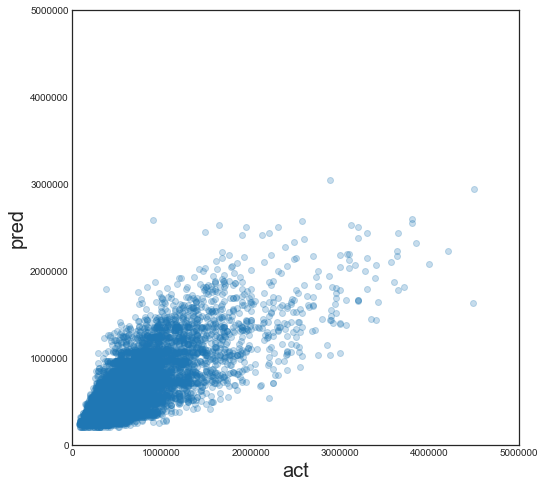

In [8]:
df['yhat'] = -51710 + 0.1224*df['y_bedrooms'] + 0.2862*df['y_bathrooms'] + 485200*df['y_waterfront'] + 0.4498*df['y_view'] + 0.602*df['y_grade'] 
yhat = df['yhat']
plt.scatter(y,yhat,alpha=0.25)
plt.xlabel('act', fontsize = 20)
plt.ylabel('pred', fontsize = 20)
plt.xlim(0,5000000)
plt.ylim(0,5000000)
plt.show()